In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
img_path='/content/drive/MyDrive/Colab Notebooks/ML4CV_lab2/baboon.jpg' 
#path for baboon image

In [3]:
bimg=plt.imread(img_path) #reading the image

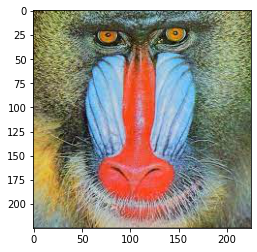

In [5]:
#plot the image/ show the image
plt.imshow(bimg)

In [6]:
bimg

array([[[124, 112,  72],
        [ 88,  76,  36],
        [102,  90,  50],
        ...,
        [ 89,  96,  54],
        [126, 134,  93],
        [153, 153, 115]],

       [[ 92,  80,  40],
        [ 63,  51,  11],
        [110,  98,  58],
        ...,
        [127, 134,  92],
        [ 80,  88,  47],
        [ 68,  70,  30]],

       [[110,  98,  60],
        [122, 110,  70],
        [ 68,  56,  16],
        ...,
        [ 95, 104,  61],
        [ 87,  95,  54],
        [162, 164, 124]],

       ...,

       [[103, 123, 121],
        [125, 145, 144],
        [130, 148, 148],
        ...,
        [111, 105,  93],
        [112, 106,  94],
        [ 90,  87,  80]],

       [[116, 136, 134],
        [134, 154, 153],
        [122, 142, 141],
        ...,
        [102,  96,  84],
        [101,  95,  83],
        [ 93,  90,  83]],

       [[ 86, 106, 104],
        [ 65,  85,  83],
        [ 67,  87,  86],
        ...,
        [ 64,  59,  55],
        [ 56,  51,  47],
        [ 56,  50,  50]]

In [7]:
bimg.shape #color image with 3 channels rgb

(225, 225, 3)

In [8]:
red_channel = bimg[:,:,0]
blue_channel = bimg[:,:,1]
green_channel = bimg[:,:,2]

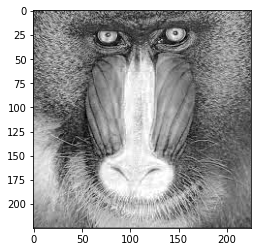

In [14]:
plt.imshow(red_channel,cmap='gray') #grey scale for first red channel

In [10]:
red_channel.shape #2D image

(225, 225)

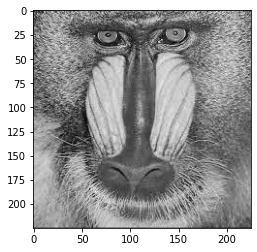

In [15]:
plt.imshow(blue_channel,cmap='gray')

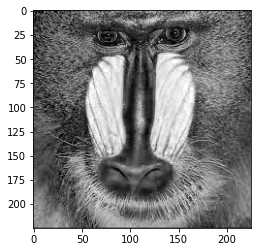

In [16]:
plt.imshow(green_channel,cmap='gray')

In [18]:
cv_bimg = cv2.imread(img_path)

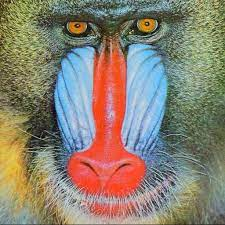

In [22]:
from google.colab.patches import cv2_imshow
cv2_imshow(cv_bimg)

In [23]:
#cv2 reads the image in bgr which is the opposite of rgb
#using cv2 we are reading image and plotting with matplotlib
#convert the cv2 image into rgb format

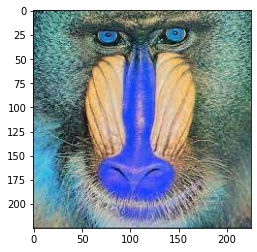

In [24]:
plt.imshow(cv_bimg)
#its showing blue channel first

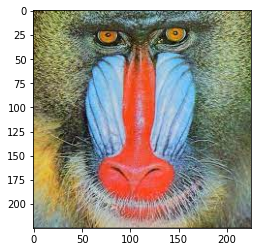

In [31]:
cvrgb = cv2.cvtColor(cv_bimg,cv2.COLOR_BGR2RGB)
plt.imshow(cvrgb)

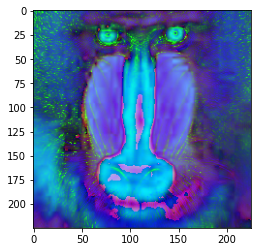

In [32]:
cvhsv = cv2.cvtColor(cv_bimg,cv2.COLOR_BGR2HSV)
plt.imshow(cvhsv)

In [33]:
from scipy import ndimage

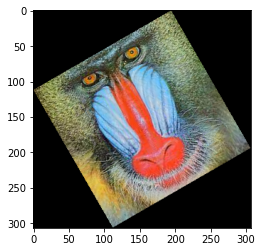

In [34]:
bimg30 = ndimage.rotate(bimg,30)
plt.imshow(bimg30)

In [35]:
bimg30.shape

(307, 307, 3)

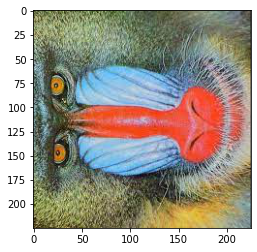

In [36]:
bimg30 = ndimage.rotate(bimg,90)
plt.imshow(bimg30)

In [37]:
bimg30.shape

(225, 225, 3)

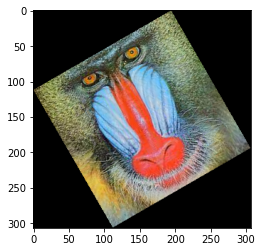

In [38]:
bimg30 = ndimage.rotate(bimg,30,reshape=True)
plt.imshow(bimg30)

ERROR: Could not find a version that satisfies the requirement figsize (from versions: none)
ERROR: No matching distribution found for figsize


##**Histogram Equalization**

In [51]:


def plot_comparison(original,name,filtered,filter_name):
  fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(8,4),sharex=True,sharey=True)
  ax1.imshow(original,cmap='gray')
  ax1.set_title(name)
  ax1.axis('off')

  ax2.imshow(filtered,cmap='gray')
  ax2.set_title(filter_name)
  ax2.axis('off')

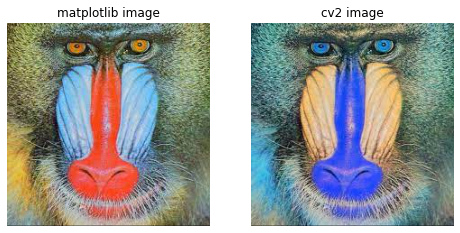

In [53]:
plot_comparison(bimg, "matplotlib image",cv_bimg,"cv2 image")

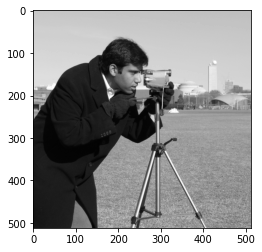

In [49]:
from skimage import data
camera = data.camera() #color img change camera to astronaut
plt.imshow(camera,cmap='gray')

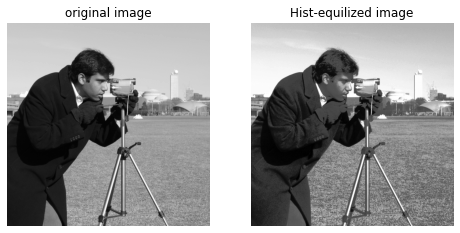

In [56]:
from skimage import exposure
heq_cam = exposure.equalize_hist(camera)
plot_comparison(camera, "original image",heq_cam,"Hist-equilized image")

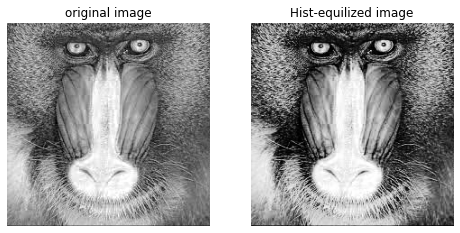

In [59]:
heq_cam = exposure.equalize_hist(bimg[:,:,0])
plot_comparison(bimg[:,:,0], "original image",heq_cam,"Hist-equilized image")

In [60]:
save_path='/content/drive/MyDrive/Colab Notebooks/ML4CV_lab2/baboon_heq.jpg'
plt.imsave(save_path,heq_cam)

##morphological operations

In [62]:
from skimage.morphology import erosion,dilation,closing,opening,disk,square

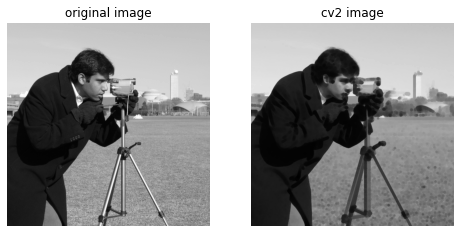

In [63]:
selem=disk(3)
camera=data.camera()
eroded = erosion(camera,selem)
plot_comparison(camera, "original image",eroded,"eroded image")

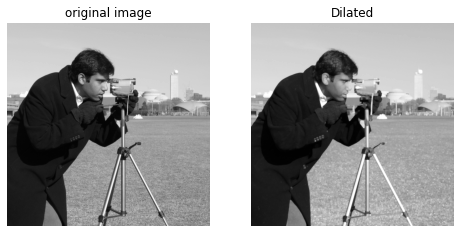

In [65]:
selem=square(3)
camera=data.camera()
dilated = dilation(camera,selem)
plot_comparison(camera, "original image",dilated,"Dilated")

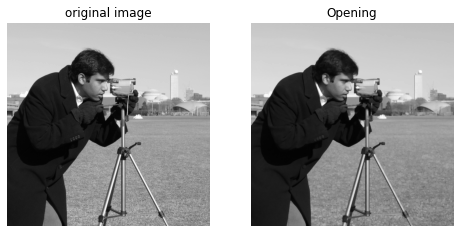

In [66]:
selem=square(3)
camera=data.camera()
opened = opening(camera,selem)
plot_comparison(camera, "original image",opened,"Opening")

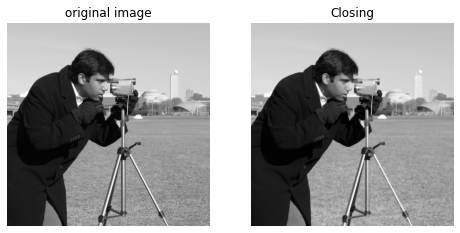

In [67]:
selem=square(3)
camera=data.camera()
closed = closing(camera,selem)
plot_comparison(camera, "original image",closed,"Closing")

#Gamma Correction

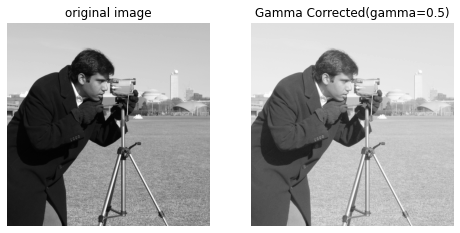

In [68]:
camera=data.camera()
gc5=exposure.adjust_gamma(camera,0.5)
gc2=exposure.adjust_gamma(camera,0.2)
plot_comparison(camera, "original image",gc5,"Gamma Corrected(gamma=0.5)")

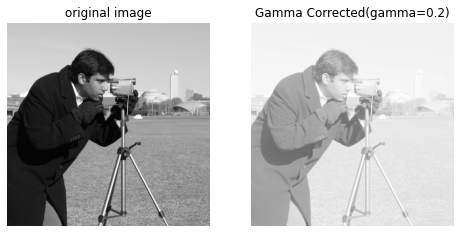

In [69]:
plot_comparison(camera, "original image",gc2,"Gamma Corrected(gamma=0.2)")

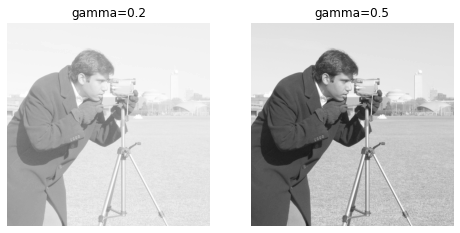

In [70]:
plot_comparison(gc2, "gamma=0.2",gc5,"gamma=0.5")

#log correction

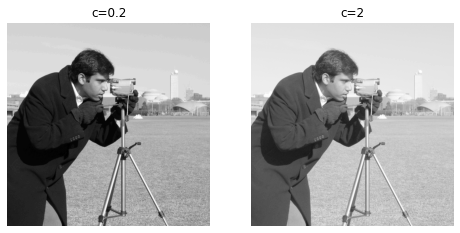

In [72]:
lg2 = exposure.adjust_log(camera,0.2)
lg5 = exposure.adjust_log(camera,1)
plot_comparison(lg2, "c=0.2",gc5,"c=2")
#contrast is important in the image
#contrast means all range of pixels all components are visible and separated by boundary and we can identify
#intensity is enhanced
#Brightnes lightens the image and some components are not visible
#light is enhanced or darkened

#image smoothening

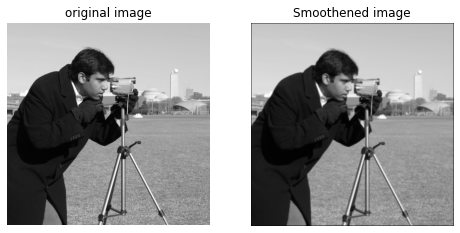

In [76]:
from scipy.signal import convolve2d
new_filter = np.ones((3,3),dtype='uint8')
smooth_filter = new_filter*(1/9)
smoothened_img=convolve2d(camera,smooth_filter)
plot_comparison(camera,"original image",smoothened_img,"Smoothened image")

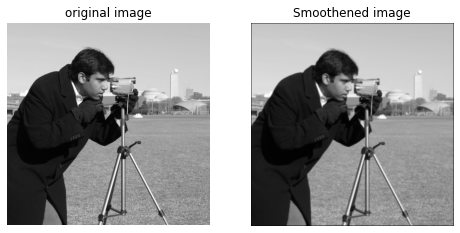

In [77]:
new_filter = np.ones((3,3),dtype='uint8')
smooth_filter = new_filter*(1/16)
smoothened_img=convolve2d(camera,smooth_filter)
plot_comparison(camera,"original image",smoothened_img,"Smoothened image")

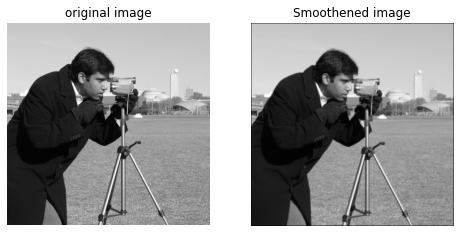

In [79]:
wf=[[1,2,1],[2,4,2],[1,2,1]]
wf=np.array(wf,dtype='uint8')
smooth_filter = wf*(1/16)
smoothened_img=convolve2d(camera,smooth_filter)
plot_comparison(camera,"original image",smoothened_img,"Smoothened image")

#adding noise

In [81]:
from skimage.util import random_noise

In [82]:
noisy_img=random_noise(camera,mode='s&p')

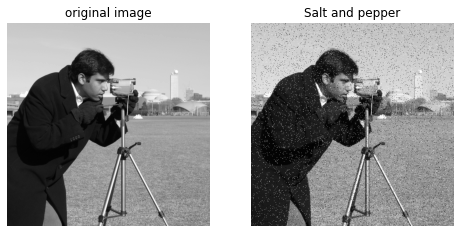

In [83]:
plot_comparison(camera,"original image",noisy_img,"Salt and pepper")

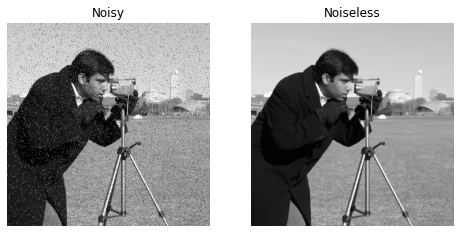

In [94]:
from skimage.filters import median
selem=square(3)
improve_img=median(noisy_img,selem)
plot_comparison(noisy_img,"Noisy",improve_img,"Noiseless")

#edge detection

In [85]:
sobel_v=[[-1,0,1],[-2,0,2],[-1,0,1]]
sobel_h=np.transpose(sobel_h)

In [86]:
h_img = convolve2d(camera,sobel_h)
v_img = convolve2d(camera,sobel_v)

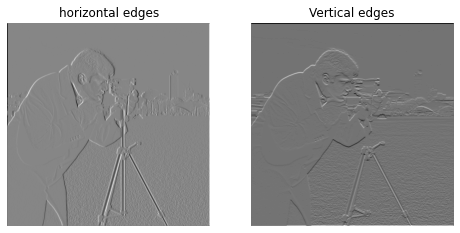

In [87]:
plot_comparison(h_img,"horizontal edges",v_img,"Vertical edges")

In [90]:
mag=np.sqrt(np.square(h_img)+np.square(v_img))

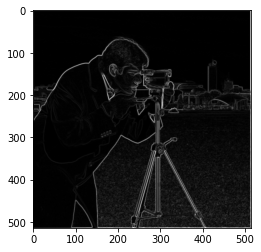

In [91]:
plt.imshow(mag,cmap='gray')